In [1]:
import numpy as np
import math
import ceo
%pylab inline
from ipywidgets import interact
#from IPython.html import widgets
#from IPython.html.widgets import interact
#from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [2]:
zi = 1
L = 1.0,
npx = 32;
u = np.linspace(-1,1,npx)*L
x,y = np.meshgrid(u,u, indexing='xy')
r = np.hypot(x,y)
P = r<=1
o = np.arctan2(y,x)
nra = np.int( np.ceil((-3 + sqrt( 9 + 8*(zi-1) ))/2) )
print "n=%d"%nra
n_mode = (nra+1)*(nra+2)/2.0
print "# mode: %d"%n_mode
a = np.zeros(n_mode)
a[zi-1] = 1.0
Z = ceo.ZernikeS(nra,a)
cuo = ceo.cuDoubleArray(host_data=o)
cur = ceo.cuDoubleArray(host_data=r)
#S = Z.surface(cur,cuo)
(S,dSdx,dSdy) = Z.surface_and_derivatives(cur,cuo)

n=0
# mode: 1


/home/ubuntu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


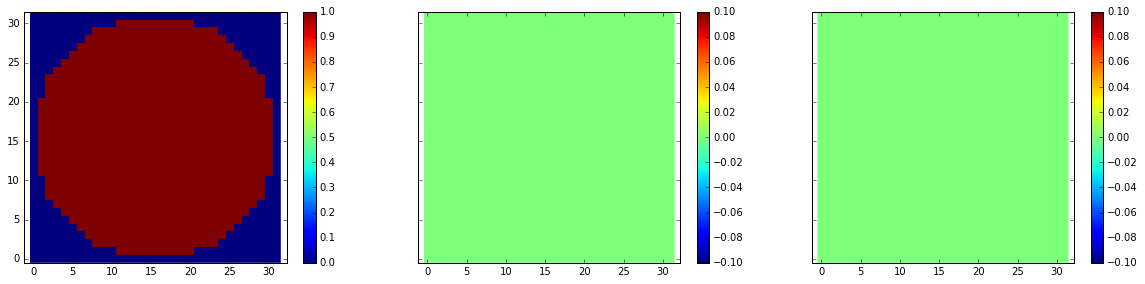

In [3]:
fig, (ax1,ax2,ax3) = subplots(ncols=3,sharey=True)
fig.set_size_inches(20,4.5)
h1 = ax1.imshow(S.host()*P,interpolation='None',origin='lower')
colorbar(h1,ax=ax1)
h2 = ax2.imshow(P*dSdx.host(),interpolation='None',origin='lower')
colorbar(h2,ax=ax2)
h3 = ax3.imshow(P*dSdy.host(),interpolation='None',origin='lower')
colorbar(h3,ax=ax3)

In [24]:
def zernike(zi=1,L=1.0,xc=0.0,yc=0.0):
    print "j=%d"%zi
    npx = 469;
    u = np.linspace(-1,1,npx)*L
    x,y = np.meshgrid(u,u, indexing='xy')
    x -= xc
    y -= yc
    r = np.hypot(x,y)
    P = r<=1
    o = np.arctan2(y,x)
    nra = np.int( np.ceil((-3 + sqrt( 9 + 8*(zi-1) ))/2) )
    print "n=%d"%nra
    n_mode = (nra+1)*(nra+2)/2.0
    #print n_mode
    a = np.zeros(n_mode)
    a[np.int(zi-1)] = 1.0
    Z = ceo.ZernikeS(nra,a)
    cuo = ceo.cuDoubleArray(host_data=o)
    cur = ceo.cuDoubleArray(host_data=r)
    tid = ceo.StopWatch()
    tid.tic()
    S = Z.surface(cur,cuo)
    (dSdx,dSdy) = Z.surface_derivatives(cur,cuo)
    tid.toc()
    print "ET: %.2fms"%tid.elapsedTime
    tid.tic()
    (S1,dSdx1,dSdy1) = Z.surface_and_derivatives(cur,cuo)
    tid.toc()
    print "ET: %.2fms"%tid.elapsedTime
    S_ = P*S.host()
    #print "Zernike mean:"
    #print np.mean(S_[P])
    #print "Zernike rms:"
    #print np.std(S_[P])
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = subplots(ncols=3,nrows=2,sharey=True)
    fig.set_size_inches(20,10)
    h1 = ax1.imshow(S_,interpolation='None',origin='lower')
    colorbar(h1,ax=ax1)
    h2 = ax2.imshow(P*dSdx.host(),interpolation='None',origin='lower')
    colorbar(h2,ax=ax2)
    h3 = ax3.imshow(P*dSdy.host(),interpolation='None',origin='lower')
    colorbar(h3,ax=ax3)
    h4 = ax4.imshow(S1.host()*P,interpolation='None',origin='lower')
    colorbar(h4,ax=ax4)
    h5 = ax5.imshow(P*dSdx.host(),interpolation='None',origin='lower')
    colorbar(h5,ax=ax5)
    h6 = ax6.imshow(P*dSdy.host(),interpolation='None',origin='lower')
    colorbar(h6,ax=ax6)

j=7
n=3
ET: 2.18ms
ET: 1.62ms


/home/ubuntu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


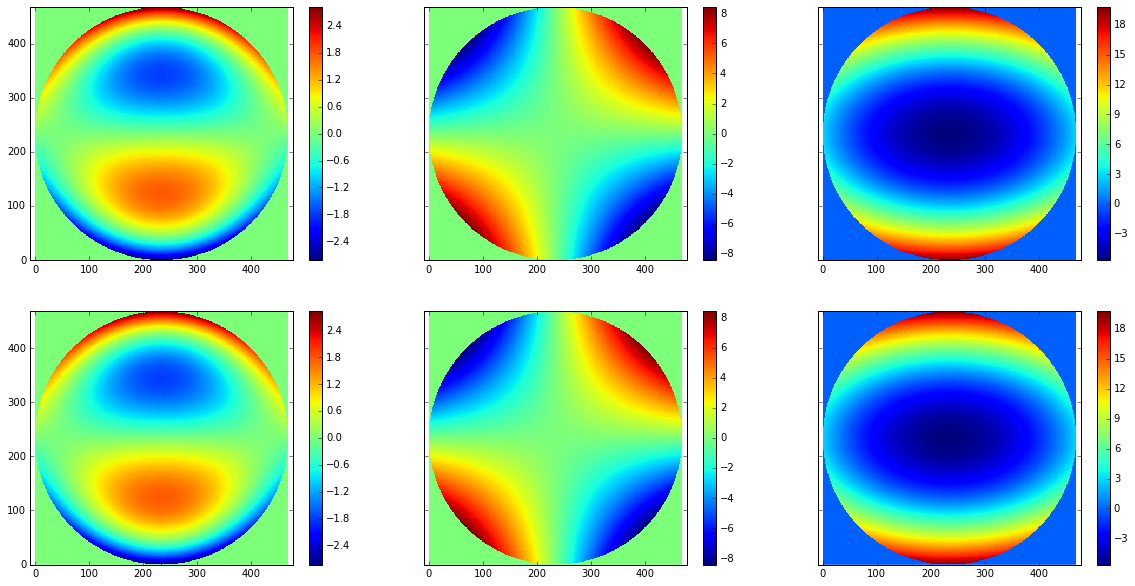

In [25]:
i = interact(zernike,zi=(1,45),L=(1.0,5.0),xc=(-2.5,2.5),yc=(-2.5,2.5))

In [4]:
def zernike(zi=1,surf_id=0):
    print "j=%d"%zi
    npx = 512;
    u = np.linspace(-1,1,npx)
    x,y = np.meshgrid(u,u)
    r = np.hypot(x,y)
    o = np.arctan2(y,x)
    nra = np.ceil((-3 + sqrt( 9 + 8*(zi-1) ))/2)
    print "n=%d"%nra
    n_mode = (nra+1)*(nra+2)/2.0
    #print n_mode
    a = np.zeros((3,n_mode))
    a[:,zi-1] = 1.0
    print a
    Z = ceo.ZernikeS(nra,a,N_SURF=3)
    cuo = ceo.cuDoubleArray(host_data=o)
    cur = ceo.cuDoubleArray(host_data=r)
    tid = ceo.StopWatch()
    tid.tic()
    S = Z.surface(cur,cuo,surf_id)
    tid.toc()
    S_ = S.host()
    fig, ax1 = subplots(ncols=1,sharey=True)
    fig.set_size_inches(20,4.5)
    h1 = ax1.imshow(S_,interpolation=None)
    colorbar(h1,ax=ax1)

j=4
n=2
[[ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]]


/home/ubuntu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


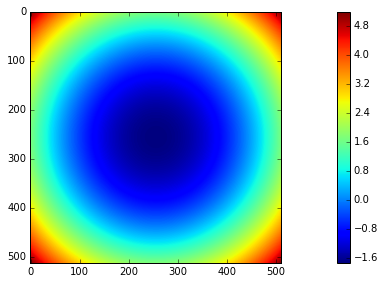

In [5]:
zernike(zi=4,surf_id=2)

n=4
S mean:0.922655 


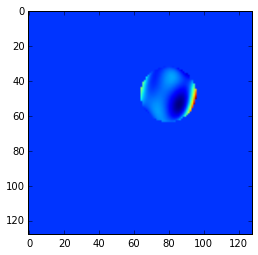

In [38]:
npx = 128
L = 4
xc = 1
yc = -1
u = np.linspace(-1,1,npx)*L
x,y = np.meshgrid(u,u, indexing='xy')
x -= xc
y -= yc
r = np.hypot(x,y)
P = r<=1
o = np.arctan2(y,x)
zi = 15
nra = np.ceil((-3 + sqrt( 9 + 8*(zi-1) ))/2)
print "n=%d"%nra
n_mode = (nra+1)*(nra+2)/2.0
#print n_mode
a = np.zeros(n_mode)
#a[3] = 1
a = np.random.rand(n_mode)
Z = ceo.ZernikeS(nra,a)
cuo = ceo.cuDoubleArray(host_data=o)
cur = ceo.cuDoubleArray(host_data=r)
tid = ceo.StopWatch()
tid.tic()
S = Z.surface(cur,cuo).host()*P
imshow(S)
print "S mean:%f "%(np.mean(S[P==1]))

In [43]:
Zp = ceo.ZernikeS(nra+1)

In [44]:
cuS = ceo.cuFloatArray(host_data=S)
Zp.projection(cuS,cur,cuo)

In [45]:
print array_str(Zp.a,precision=2,suppress_small=True)

[[ 0.92  0.15  0.    0.99  0.17  0.93  0.59  1.01  0.33  0.48  0.59  0.85
   0.91  0.61  0.62  0.05 -0.01  0.06 -0.04  0.08 -0.05]]


In [46]:
print array_str(a,precision=2)

[ 0.9   0.13  0.01  0.95  0.18  0.9   0.61  0.99  0.37  0.45  0.54  0.82
  0.92  0.55  0.64]


<matplotlib.colorbar.Colorbar instance at 0x2ad6ce3ce1b8>

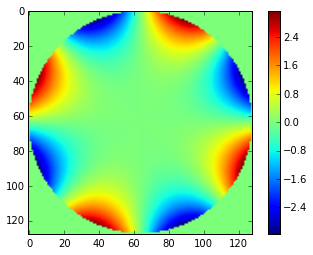

In [11]:
Zp.reset()
Z = np.zeros((npx*npx,Zp.n_mode))
for k in range(Zp.n_mode):
    Zp.a[0,k] = 1
    Zp.update()
    S = Zp.surface(cur,cuo).host(shape=(npx*npx,1))*P.reshape(-1,1)
    Z[:,k] = S.flatten()
    Zp.a[0,k] = 0
S.shape
imshow(S.reshape(npx,npx))
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x2ad6ce1f53f8>

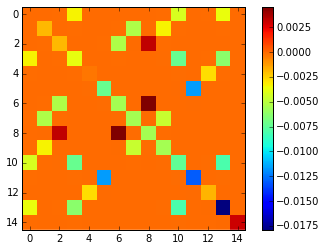

In [12]:
GZ = np.dot(Z.T,Z)/P.sum()
imshow(GZ-np.eye(Zp.n_mode),interpolation='None')
colorbar()

In [13]:
src = ceo.Source("V",rays_box_size=25.5, rays_box_sampling=201, rays_origin=[0,0,25])
gmt = ceo.GMT_MX(25.5,201,M1_radial_order=5)

In [14]:
gmt.M1.zernike.a[0,0] = 1e-6
gmt.M1.zernike.update()

In [15]:
#gmt.M1.trace(src.rays)
#gmt.propagate(src)
src.stop(gmt.M2)
src.trace(gmt.M1)
src.trace(gmt.M2)
src.opd2phase()

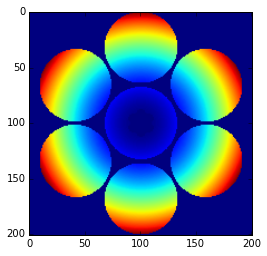

In [16]:
imshow(src.rays.optical_path_difference.host(shape=(201,201)))

In [17]:
gmt.M2.trace(src.rays)

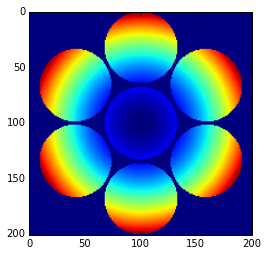

In [18]:
imshow(src.rays.optical_path_difference.host(shape=(201,201)))

In [19]:
L = 4
xc = 2
yc = 0
npx = 501;
u = np.linspace(-1,1,npx)*L
x,y = np.meshgrid(u,u, indexing='xy')
x -= xc
y -= yc
r = np.hypot(x,y)
P = r<=1
o = np.arctan2(y,x)
nra = np.ceil((-3 + sqrt( 9 + 8*(zi-1) ))/2)
print "n=%d"%nra
n_mode = (nra+1)*(nra+2)/2.0
#print n_mode
a = np.zeros(n_mode)
a[zi-1] = 1.0
Z = ceo.ZernikeS(nra,a)
cuo = ceo.cuDoubleArray(host_data=o)
cur = ceo.cuDoubleArray(host_data=r)


n=4


<matplotlib.colorbar.Colorbar instance at 0x2ad6d488b680>

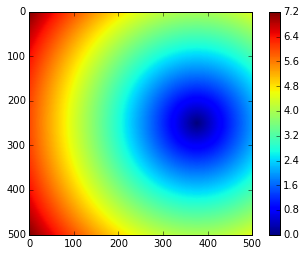

In [20]:
imshow(cur.host())
colorbar()